In [112]:
import numpy as np #Linear algebra
import pandas as pd #data processing
import re #data manupulation
import nltk #token, stopwords
import matplotlib.pyplot as plt #data visualization
import warnings
import seaborn as sns #visualization library
import datetime
import string
import re
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob #sentiment analysis
from textblob import Word
from nltk.probability import FreqDist

# EXPLORATORY DATA ANALYSIS - US Election 2020

In [119]:
pip install textblob

In [49]:
#Importing dataset
trump_tweets = pd.read_csv('C:/Users/user/Desktop/Python program/hashtag_donaldtrump.csv',lineterminator='\n')

#clean data
trump_tweets['country'].replace({'United States: United States of America'}, inplace=True)

trump_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [48]:
#Importing dataset
biden_tweets = pd.read_csv('C:/Users/user/Desktop/Python program/hashtag_joebiden.csv',lineterminator='\n')

# Uniformity in Country name for better analysis
biden_tweets['country'].replace({'United States: United States of America'}, inplace=True)
biden_tweets.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:18,1.316529e+18,#HunterBiden #HunterBidenEmails #JoeBiden #Joe...,0.0,0.0,Twitter for iPad,8.099044e+08,Cheri A. 🇺🇸,Biloximeemaw,"Locked and loaded Meemaw. Love God, my family ...",...,6628.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.517827283
2,2020-10-15 00:00:20,1.316529e+18,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Twitter Web App,3.494182e+09,Flag Waver,Flag_Wavers,NaN,...,1536.0,Golden Valley Arizona,46.304036,-109.171431,NaN,United States of America,North America,Montana,MT,2020-10-21 00:00:01.035654566
3,2020-10-15 00:00:21,1.316529e+18,@chrislongview Watching and setting dvr. Let’s...,0.0,0.0,Twitter for iPhone,8.242596e+17,Michelle Ferg,MichelleFerg4,NaN,...,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.553481849
4,2020-10-15 00:00:22,1.316529e+18,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,Twitter Web App,1.032807e+18,the Gold State,theegoldstate,A Silicon Valley #independent #News #Media #St...,...,390.0,"California, USA",36.701463,-118.755997,NaN,United States of America,North America,California,CA,2020-10-21 00:00:02.071309132


In [50]:
trump_tweets.shape

(970919, 21)

In [51]:
biden_tweets.shape

(776886, 21)

In [52]:
trump_tweets.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,9.709190e+05,970919.000000,970919.000000,9.709190e+05,9.709190e+05,445719.000000,445719.000000
mean,1.322494e+18,7.477011,1.698500,4.468311e+17,2.260357e+04,35.697936,-40.369638
std,2.555133e+15,158.058117,40.028419,5.544702e+17,3.042152e+05,18.823129,67.531751
min,1.316529e+18,0.000000,0.000000,5.310000e+02,0.000000e+00,-90.000000,-175.202642
25%,1.320478e+18,0.000000,0.000000,2.169326e+08,7.700000e+01,32.701939,-96.796856
50%,1.323612e+18,0.000000,0.000000,2.373392e+09,4.410000e+02,39.783730,-74.006015
75%,1.324505e+18,1.000000,0.000000,1.078344e+18,2.066000e+03,46.603354,6.776314
max,1.325589e+18,74084.000000,20491.000000,1.325581e+18,1.911533e+07,90.000000,179.048837


In [53]:
biden_tweets.describe()

,tweet_id,likes,retweet_count,user_id,user_followers_count,lat,long
count,7.768860e+05,776886.000000,776886.000000,7.768860e+05,7.768860e+05,355293.000000,355293.000000
mean,1.322844e+18,10.161164,2.131331,4.532033e+17,2.884994e+04,35.104203,-41.979660
std,2.585560e+15,390.974423,96.661527,5.573483e+17,4.141085e+05,17.907910,67.823724
min,1.316529e+18,0.000000,0.000000,1.081000e+03,0.000000e+00,-79.406307,-172.120051
25%,1.320870e+18,0.000000,0.000000,2.257285e+08,7.400000e+01,31.816038,-97.268406
50%,1.323899e+18,0.000000,0.000000,2.464208e+09,4.280000e+02,39.783730,-74.006015
75%,1.325115e+18,2.000000,0.000000,1.088044e+18,2.081000e+03,43.653482,5.966069
max,1.325589e+18,165702.000000,63473.000000,1.325575e+18,8.241710e+07,90.000000,179.048837


In [87]:
#Removing unnecessary columns
trump_tweets = trump_tweets.drop(columns=['tweet_id', 'collected_at', 'user_description'])
biden_tweets= biden_tweets.drop(columns=['tweet_id', 'collected_at', 'user_description'])

In [88]:
#add a column specifying which dataset the tweet belongs to
trump_tweets.loc[:,'candidate'] = 'Trump'
biden_tweets.loc[:,'candidate'] = 'Biden'

In [89]:
trump_tweets.sort_values(by='created_at') #sort by creation times
trump_tweets.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,candidate
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,2009-02-02 23:08:28,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,Trump
22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,Trump


In [90]:
biden_tweets.sort_values(by='created_at') #sort by creation times
biden_tweets.head()

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,candidate
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,2009-02-02 23:08:28,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,Biden
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,2010-01-04 04:34:39,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States,North America,Florida,FL,Biden
25,2020-10-15 00:01:57,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,0.0,0.0,Twitter for Android,1.300837e+18,Sam KEYS,SamKEYS65729181,2020-09-01 16:45:14,29.0,"Los Angeles, CA",34.053691,-118.242766,Los Angeles,United States,North America,California,CA,Biden
29,2020-10-15 00:02:06,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,0.0,0.0,Twitter Web App,3.343224e+08,Elphygirl,Elphygirl,2011-07-12 22:32:26,166.0,"New York, NY",40.712728,-74.006015,New York,United States,North America,New York,NY,Biden
34,2020-10-15 00:02:23,#realDonaldTrump addresses #JoeBiden and #Hunt...,0.0,1.0,Twitter for iPhone,3.381891e+09,Truth Hurts,TheTruthSekr,2015-08-29 13:25:25,411.0,"Minneapolis, MN",44.977300,-93.265469,Minneapolis,United States,North America,Minnesota,MN,Biden


In [91]:
# Updating the country name and making the changes permanent
cntry = {"United States of America":"United States"}
trump_tweets['country'].replace(cntry, inplace=True)
biden_tweets['country'].replace(cntry, inplace=True)

trump_tweets = trump_tweets.loc[trump_tweets['country'] == "United States"]
biden_tweets = biden_tweets.loc[biden_tweets['country'] == "United States"]


#drop the columns with null values
trump_tweets = trump_tweets.dropna()
biden_tweets = biden_tweets.dropna()

In [38]:
#deleting duplicate tweets using inner join
trumpids=trump_tweets.tweet_id
bidenids=biden_tweets.tweet_id
id_common_tweets=set(trump_tweets.tweet_id).intersection(set(biden_tweets.tweet_id))
len(id_common_tweets)

221700

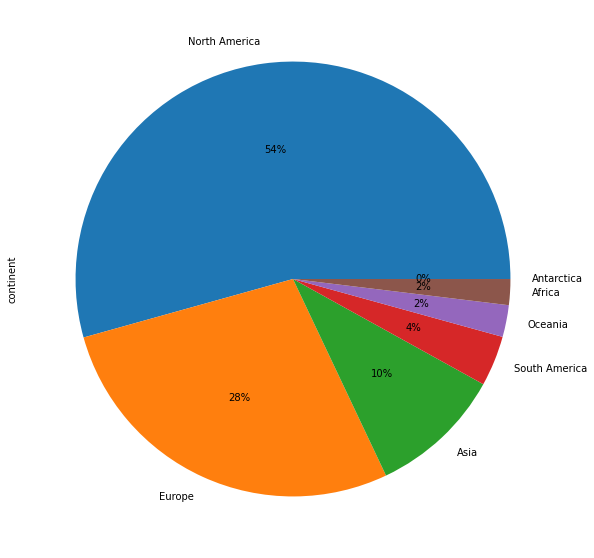

In [46]:
#Setting Plot Size for Trump tweets
plot_size = plt.rcParams["figure.figsize"]  

plot_size[0] = 15 
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size  

#Pie Chart of Tweets
trump_tweets.continent.value_counts().plot(kind='pie', autopct='%1.0f%%')


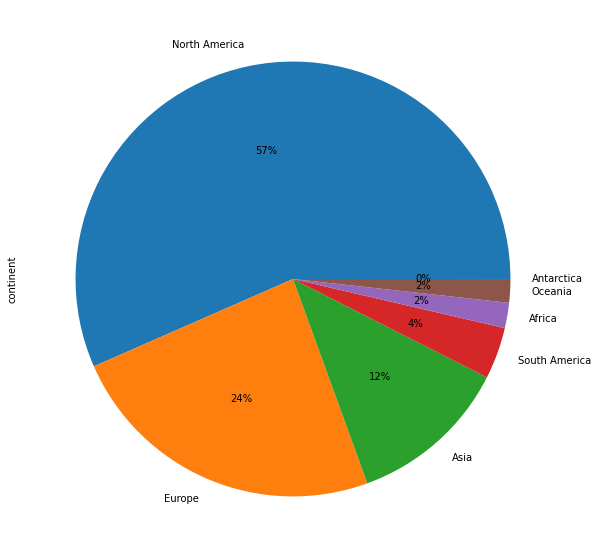

In [47]:
#Setting Plot Size for Trump tweets
plot_size = plt.rcParams["figure.figsize"]  

plot_size[0] = 15 
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size  

#Pie Chart of Tweets
biden_tweets.continent.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [94]:
#group by states
trump_newtweets = trump_tweets.groupby(['state']).count().tweet 
trumptest = pd.DataFrame(trump_newtweets)
biden_newtweets = biden_tweets.groupby(['state']).count().tweet
bidentest = pd.DataFrame(biden_newtweets)

#join the two tables using the state and counting the number of tweets by state
state_data = pd.merge(trumptest, bidentest, on= 'state') 
state_data = state_data.rename(columns={'tweet_x': 'Trump Tweets', 'tweet_y': 'Biden Tweets'})
state_data.head()

,Trump Tweets,Biden Tweets
state,,
Alabama,293,275
Alaska,88,121
Arizona,1602,1735
Arkansas,68,66
California,18673,15960


In [117]:
trump_newtweets1=trump_tweets.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
trumptest1=pd.DataFrame(trump_newtweets1)

biden_newtweets1=biden_tweets.groupby(['source']).count().tweet.sort_values(ascending=False)[:6]
bidentest1=pd.DataFrame(biden_newtweets1)

source_data=pd.merge(trumptest1, bidentest1, on='source')
source_data=state_data.rename(columns={'tweet_x':'Trump Tweets', 'tweet_y': 'Bident Tweets'})
source_data.head(15)

,Trump Tweets,Biden Tweets
state,,
Alabama,293,275
Alaska,88,121
Arizona,1602,1735
Arkansas,68,66
California,18673,15960
Colorado,1606,1183
Connecticut,191,142
Delaware,15,84
District of Columbia,9281,6715


Text(0, 0.5, 'Tweets per State')

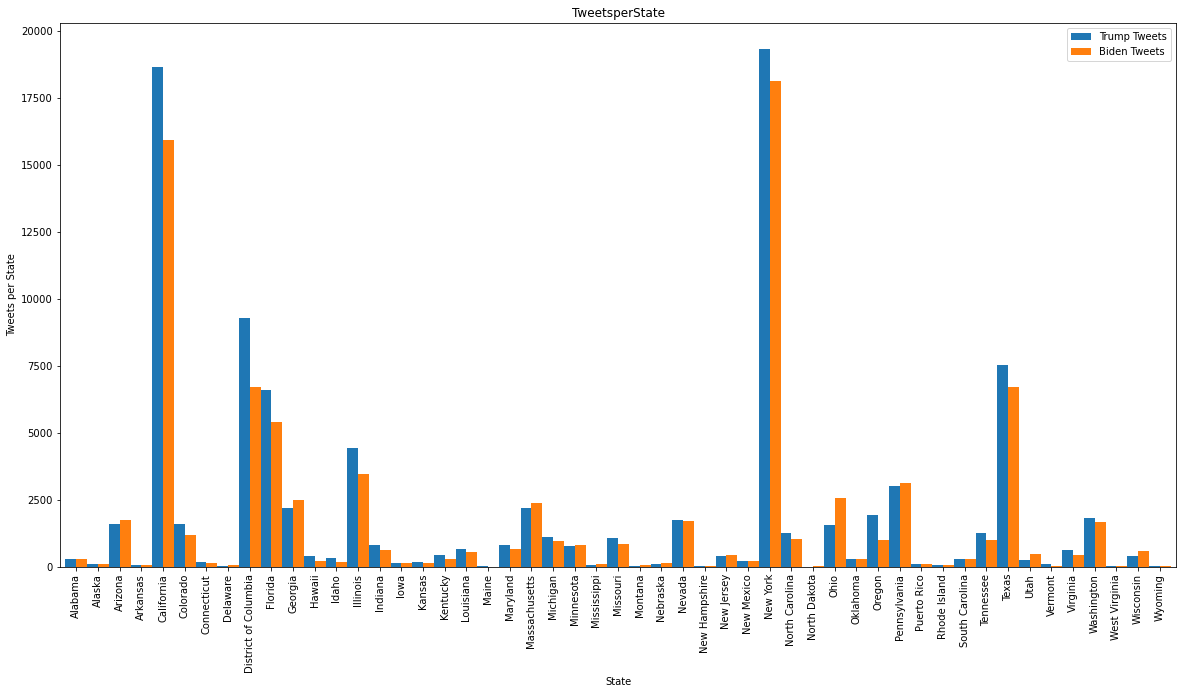

In [96]:
state_data.plot(kind='bar',title='TweetsperState', figsize=(20,10), width=1)
plt.xlabel('State')
plt.ylabel('Tweets per State')

In [132]:
merge_tweets=pd.concat([trump_tweets,biden_tweets])
merge_tweets.sort_values(by='created_at')
merge_tweets.head(10)

,created_at,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,candidate
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,Trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,2009-06-15 19:05:35,5393.0,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,Trump
11,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,2009-02-02 23:08:28,1396.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,Trump
12,2020-10-15 00:00:26,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,2020-03-26 23:14:28,496.0,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,Trump
22,2020-10-15 00:01:14,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,2007-08-26 05:56:11,1185.0,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,Trump
27,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,2010-01-04 04:34:39,83.0,"Tampa, Florida",27.947760,-82.458444,Tampa,United States,North America,Florida,FL,Trump
29,2020-10-15 00:01:30,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,3.602439e+07,Baylee,bayleewashere,2009-04-28 08:55:59,1952.0,"Western Washington, USA",41.882823,-87.686307,Chicago,United States,North America,Illinois,IL,Trump
36,2020-10-15 00:01:44,Who does #trump owe 420 million dollars to? Wh...,1.0,0.0,Twitter Web App,1.611077e+07,Therese Flanagan 🌊 🏳️‍🌈✊,thereseflanagan,2008-09-03 10:29:02,8345.0,Chicago,41.875562,-87.624421,Chicago,United States,North America,Illinois,IL,Trump
42,2020-10-15 00:01:53,"#TheWeek: ""#Trump in Penn: ""I saved suburbia. ...",0.0,0.0,Twitter Web App,5.848852e+07,thelaughmakers@gmail.com,TheLaughMakers,2009-07-20 14:37:32,1855.0,"Studio City, California",34.148399,-118.396188,Los Angeles,United States,North America,California,CA,Trump
43,2020-10-15 00:01:53,#TheReidOut \n\nAm I suppose to feel badly for...,2.0,0.0,Twitter for Android,2.903258e+09,CitizenTaylor,CommonToadnMd,2014-12-03 03:11:02,83.0,"Washington, DC",38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,Trump


Text(0.5, 1.0, 'Donald vs Biden')

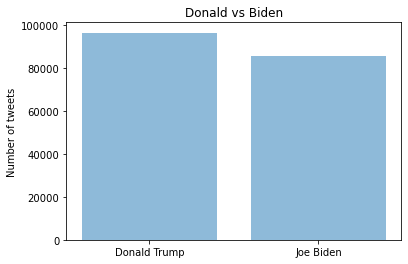

In [149]:
trump_reviews = merge_tweets.query('(candidate == "Trump")').tweet.sort_values(ascending=False).count()
biden_reviews = merge_tweets.query('(candidate == "Biden")').tweet.sort_values(ascending=False).count()

objects = ('Donald Trump','Joe Biden')
y_pos = np.arange(len(objects))
performance = [trump_reviews,biden_reviews]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of tweets')
plt.title('Donald vs Biden')

In [156]:
def clean_tweets(tweet):
 
    tweet = re.sub(r':', '', str(tweet))
    tweet = re.sub(r'‚Ä¶', '', str(tweet))
    tweet = re.sub('@[A-Za-z0–9]+', '', str(tweet))               
    tweet = re.sub('#', '', str(tweet)) # Removing '#' hash tag
    tweet = re.sub('https?:\/\/\S+', '', str(tweet)) # Removing hyperlink
    #replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+',' ',str(tweet))
    tweet = str(tweet).lower()
    tweet = re.sub('\[.*?\]', '', tweet)
    tweet = re.sub('https?://\S+|www\.\S+', '', tweet)
    tweet = re.sub('<.*?>+', '', tweet)
    tweet = re.sub('\n', '', tweet)
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = re.sub(r'#','',tweet)
    tweet = re.sub(r'RT[\s]+','',tweet)
    tweet = re.sub(r'[^\w]', ' ', tweet)
    tweet = re.sub('https', '', tweet)
    tweet = re.sub('https ', '', tweet)
    tweet = re.sub('co', '', tweet)

    return tweet

In [159]:
trump = merge_tweets.query('(candidate == "Trump")')
biden = merge_tweets.query('(candidate == "Biden")')

In [160]:
def getSubjectivity(tweet):
    try:
        return TextBlob(tweet).sentiment.subjectivity
    except:
        return None


# Create a function to get the polarity
def getPolarity(tweet):
    try:
        return  TextBlob(tweet).sentiment.polarity
    except:
        return None

def sentiment_calc(tweet):
    try:
        return TextBlob(tweet).sentiment
    except:
        return None
    
country='United States'
biden=biden[biden['country']==country]
biden['edited_tweet'] = biden['tweet'].apply(clean_tweets)
# Create two new columns 'Subjectivity' & 'Polarity'
biden['subjectivity'] = biden['edited_tweet'].apply(getSubjectivity)
biden['polarity'] = biden['edited_tweet'].apply(getPolarity)
biden['sentiment'] = biden['edited_tweet'].apply(sentiment_calc)

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

biden['analysis'] = biden['polarity'].apply(getAnalysis)

In [167]:
country='United States'
trump=trump[trump['country']==country]
trump['edited_tweet'] = trump['tweet'].apply(clean_tweets)
# Create two new columns 'Subjectivity' & 'Polarity'
trump['subjectivity'] = trump['edited_tweet'].apply(getSubjectivity)
trump['polarity'] = trump['edited_tweet'].apply(getPolarity)
trump['sentiment'] = trump['edited_tweet'].apply(sentiment_calc)

def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'

trump['analysis'] = trump['polarity'].apply(getAnalysis)

Text(0.5, 1.0, 'Sentiment Analyisis Biden : United States')

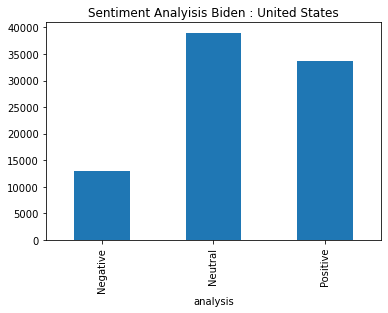

In [169]:
biden.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis Biden : '+country)

Text(0.5, 1.0, 'Sentiment Analyisis Trump: United States')

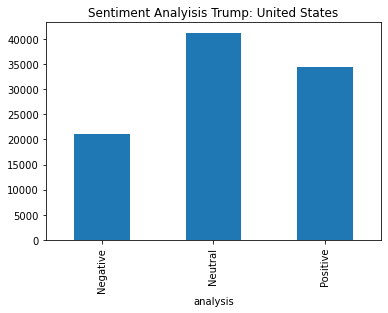

In [170]:
trump.groupby('analysis')['analysis'].count().plot.bar()
plt.title('Sentiment Analyisis Trump: '+country)

In [173]:
x=trump['tweet']
y=biden['tweet']
print(len(x),len(y))

96623 85761
